<a href="https://colab.research.google.com/github/sayma-code/Computer-Vision/blob/main/Excercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Inliers after RANSAC: 66


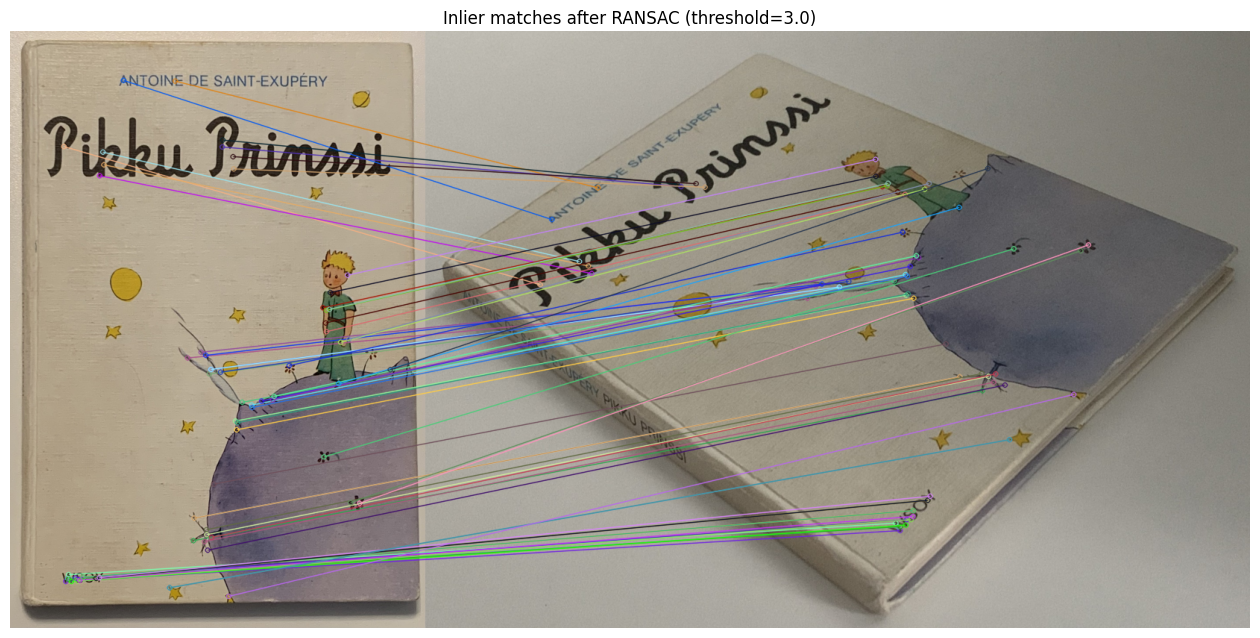

In [ ]:
# Load images (change paths if needed)
img1 = cv.imread('ref1.png')
img2 = cv.imread('rot1.png')
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# SIFT keypoints and descriptors
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Feature matching and filtering
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# --- Geometric verification using RANSAC ---
if len(good_matches) >= 4:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    ransac_thresh = 3.0  # Try for example 1.0, 3.0, 5.0, 10.0
    H, mask = cv.findHomography(dst_pts, src_pts, cv.RANSAC, ransac_thresh)
    matches_mask = mask.ravel().tolist()
    inlier_matches = [m for i, m in enumerate(good_matches) if matches_mask[i]]
    print(f"Inliers after RANSAC: {len(inlier_matches)}")
else:
    print("Not enough matches for RANSAC.")
    inlier_matches = good_matches
    matches_mask = None
# --- Geometric verification using RANSAC ---

# Use inlier_matches for drawing
matched_img = cv.drawMatches(img1, kp1, img2, kp2, inlier_matches, None, flags=2)
plt.figure(figsize=(16,8))
plt.title(f'Inlier matches after RANSAC (threshold={ransac_thresh})')
plt.imshow(cv.cvtColor(matched_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
h1, w1 = img1.shape[:2]
warped_img2 = cv.warpPerspective(img2, H, (w1, h1))

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [161, 170, 174],
        [161, 170, 174],
        [160, 169, 173]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [161, 170, 174],
        [161, 170, 174],
        [160, 169, 173]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [162, 171, 174],
        [161, 170, 174],
        [159, 168, 172]],

       ...,

       [[154, 163, 167],
        [151, 160, 164],
        [156, 165, 169],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[154, 163, 167],
        [155, 164, 168],
        [159, 168, 172],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[155, 164, 168],
        [158, 167, 171],
        [155, 164, 168],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
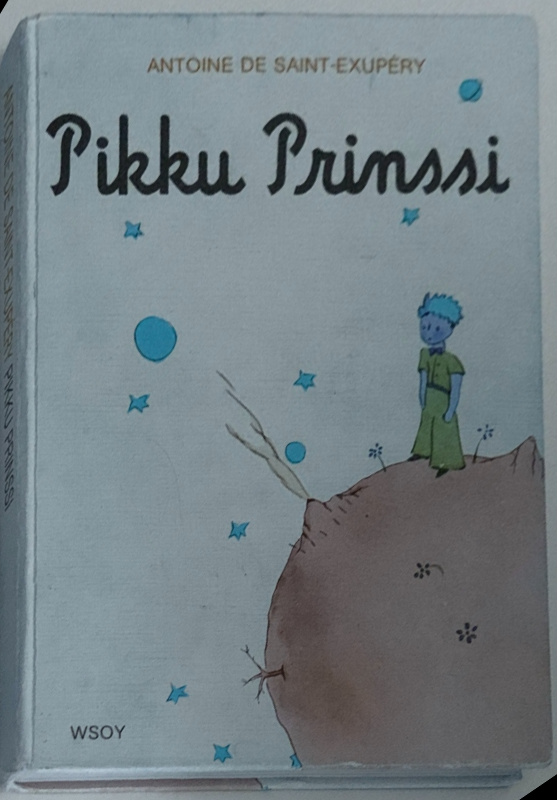

array([[[190, 207, 220],
        [183, 200, 213],
        [187, 204, 217],
        ...,
        [187, 197, 207],
        [180, 191, 201],
        [180, 194, 203]],

       [[174, 191, 204],
        [179, 196, 209],
        [178, 195, 208],
        ...,
        [182, 192, 202],
        [177, 188, 198],
        [184, 198, 207]],

       [[175, 192, 205],
        [170, 187, 200],
        [171, 188, 201],
        ...,
        [182, 192, 202],
        [185, 196, 206],
        [189, 203, 213]],

       ...,

       [[151, 167, 179],
        [152, 168, 180],
        [152, 168, 180],
        ...,
        [165, 182, 191],
        [166, 181, 191],
        [169, 181, 191]],

       [[152, 169, 180],
        [152, 169, 180],
        [153, 169, 180],
        ...,
        [164, 183, 191],
        [165, 182, 190],
        [167, 182, 189]],

       [[157, 167, 176],
        [158, 168, 177],
        [159, 168, 178],
        ...,
        [170, 182, 190],
        [172, 183, 189],
        [173, 181, 187]]], dtype=uint8)
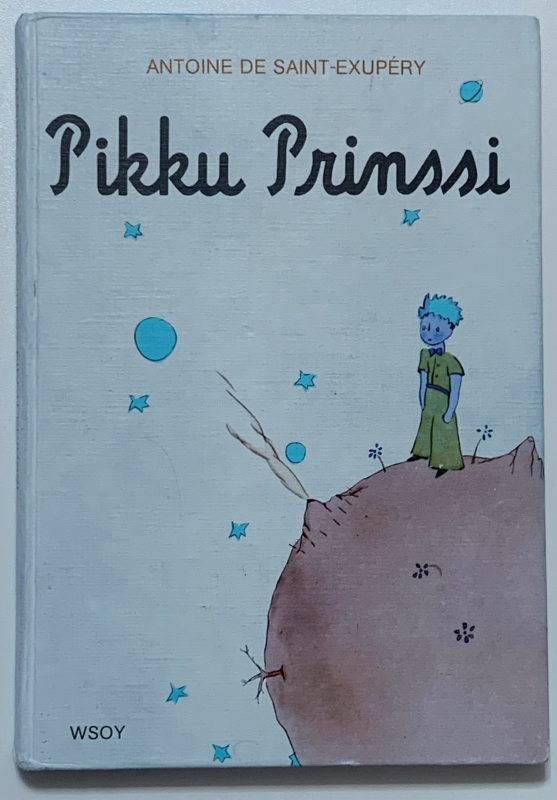

In [ ]:
display(warped_img2)
display(img1)